In [1]:
import mne
import mne_bids
import os, os.path as op
import nilearn
import matplotlib.pyplot as plt

from nilearn import *

# Setup Paths

In [54]:
#Raw data 
bids_root = op.join('/data/', os.environ['USER'], 'meg_workshop_data') 
tmp_ = op.join(bids_root, 'derivatives')

#Freesurfer directory with anatomical scans
fs_subjects_dir = op.join(tmp_, 'freesurfer','subjects')

#Output directory for saving data
deriv_root = op.join(tmp_, 'meg_workshop_day1')
if not op.exists(deriv_root): os.mkdir(deriv_root)

In [55]:
subject = 'ON02811'
bids_path = mne_bids.BIDSPath(root=bids_root, subject = subject, session='01', task='airpuff', run='01', datatype='meg')
bids_deriv_path = bids_path.copy().update(root=deriv_root, check=False)
if not op.exists(bids_deriv_path.root): os.mkdir(bids_deriv_path.root)

t1_bids_path = bids_path.copy().update(datatype='anat', session='01', task=None, run=None, suffix='T1w', acquisition='MPRAGE', extension='.nii.gz')

In [56]:
raw = mne_bids.read_raw_bids(bids_path)

ds directory : /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -1.82   70.43    0.00 mm <->   -1.82   70.43    0.00 mm (orig :  -45.24   54.14 -275.77 mm) diff =    0.000 mm
       1.82  -70.43    0.00 mm <->    1.82  -70.43    0.00 mm (orig :   62.56  -36.39 -269.47 mm) diff =    0.000 mm
      90.00    0.00    0.00 mm <->   90.00   -0.00   -0.00 mm (orig :   65.74   74.78 -250.30 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds/sub-ON02811_ses-01_task-airpuff_run-01_meg.meg4: 
    System clock channel is available, checking which s

/tmp/ipykernel_3227456/3316973082.py:1: RuntimeWarning: The unit for channel(s) SCLK01-177, UADC001, UPPT001, trigger has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)
/tmp/ipykernel_3227456/3316973082.py:1: RuntimeWarning: participants.tsv file not found for /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds
  raw = mne_bids.read_raw_bids(bids_path)


In [58]:
raw.ch_names[0:10]

['SCLK01-177', 'BG1', 'BG2', 'BG3', 'BP1', 'BP2', 'BP3', 'BR1', 'BR2', 'BR3']

In [60]:
trans = mne_bids.get_head_mri_trans(bids_path, t1_bids_path=t1_bids_path, fs_subject='sub-'+subject, fs_subjects_dir=fs_subjects_dir)

ds directory : /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -1.82   70.43    0.00 mm <->   -1.82   70.43    0.00 mm (orig :  -45.24   54.14 -275.77 mm) diff =    0.000 mm
       1.82  -70.43    0.00 mm <->    1.82  -70.43    0.00 mm (orig :   62.56  -36.39 -269.47 mm) diff =    0.000 mm
      90.00    0.00    0.00 mm <->   90.00   -0.00   -0.00 mm (orig :   65.74   74.78 -250.30 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds/sub-ON02811_ses-01_task-airpuff_run-01_meg.meg4: 
    System clock channel is available, checking which s

/tmp/ipykernel_3227456/1881747097.py:1: RuntimeWarning: The unit for channel(s) SCLK01-177, UADC001, UPPT001, trigger has changed from V to NA.
  trans = mne_bids.get_head_mri_trans(bids_path, t1_bids_path=t1_bids_path, fs_subject='sub-'+subject, fs_subjects_dir=fs_subjects_dir)
/tmp/ipykernel_3227456/1881747097.py:1: RuntimeWarning: participants.tsv file not found for /data/stoutjd/meg_workshop_data/sub-ON02811/ses-01/meg/sub-ON02811_ses-01_task-airpuff_run-01_meg.ds
  trans = mne_bids.get_head_mri_trans(bids_path, t1_bids_path=t1_bids_path, fs_subject='sub-'+subject, fs_subjects_dir=fs_subjects_dir)


In [90]:
trans

<Transform | head->MRI (surface RAS)>
[[ 0.99795308  0.03128865 -0.0557733   0.00288806]
 [-0.05788118  0.81276317 -0.57971182  0.00432162]
 [ 0.02719208  0.58175343  0.81291054 -0.03190548]
 [ 0.          0.          0.          1.        ]]

### Prepare Imaging for Source Localization

In [13]:
# fwd_name=f'{output_dir}/{subjid}-fwd.fif'
fwd_name = bids_deriv_path.copy().update(extension='.fif', suffix='fwd')

In [92]:
#Requires Freesurfer -  This is already done for our subject
#mne.bem.make_watershed_bem(subjid, subjects_dir=subjects_dir)

## Run the following cell and copy the output line into the terminal.<br>  This will launch Afni and open the subject file for localizing fiducials.

In [54]:
print(f'afni {t1_bids_path.fpath}') 

afni /data/MEG_workshop_data/ds004215/sub-ON02811/ses-01/anat/sub-ON02811_ses-01_acq-MPRAGE_T1w.nii.gz


## Do a use case for calc_mnetrans

In [21]:
import nih2mne
from nih2mne import calc_mnetrans

In [22]:
trans_fname = f'{topdir}/{subjid}-trans.fif'
if not os.path.exists(trans_fname):
    # The calc_mnetrans.py code takes tagged Afni, Brainsight, or BIDS json
    anat_json = f'{topdir}/{subjid}/ses-01/meg/{subjid}_ses-01_task-airpuff_run-01_coordsystem.json'
    ! calc_mnetrans.py -anat_json {anat_json} -trans_output {subjid}-trans.fif -dsname {meg_fname} -subject {subjid} -subjects_dir {subjects_dir}
    trans = mne.read_trans(trans_fname)
else:
    trans = mne.read_trans(trans_fname)

NameError: name 'topdir' is not defined

### Plot the transform

In [23]:
mne.viz.plot_alignment(raw.info, trans=trans, subject='sub-'+subject, subjects_dir=fs_subjects_dir, dig=True)

Using pyvistaqt 3d backend.



Qt: Session management error: None of the authentication protocols specified are supported


Using outer_skin.surf for head surface.
Getting helmet for system CTF_275
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 272


In [28]:
bids_deriv_path.mkdir()

BIDSPath(
root: /data/MEG_workshop_data/ds004215/derivatives/MEGworkshop
datatype: meg
basename: sub-ON02811_ses-01_task-airpuff_run-01)

In [21]:
# vol_fwd_fname = bids_deriv_path.copy().update(extension='.fif', suffix='volfwd')
# bemsol_fname = vol_fwd_fname.copy().update(suffix='bemsol')
# bem = mne.make_bem_model('sub-'+subject, subjects_dir=fs_subjects_dir, conductivity=[0.3])
# bem_sol = mne.make_bem_solution(bem)
# mne.bem.write_bem_solution(bemsol_fname.fpath, bem_sol)

In [2]:
# fwd_name=f'{output_dir}/{subjid}_vol-fwd.fif'
vol_fwd_fname = bids_deriv_path.copy().update(extension='.fif', suffix='volfwd')
bemsol_fname = vol_fwd_fname.copy().update(suffix='bemsol')
if not os.path.exists(vol_fwd_fname):
    # Make a 1 layer bem from the inner skull - Appropriate for MEG, bad for EEG
    mne.bem.make_watershed_bem('sub-'+subject, subjects_dir=fs_subjects_dir)
    bem = mne.make_bem_model('sub-'+subject, subjects_dir=fs_subjects_dir, conductivity=[0.3])
    bem_sol = mne.make_bem_solution(bem)
    mne.bem.write_bem_solution(bemsol_fname.fpath, bem_sol)
    src = mne.source_space.setup_volume_source_space(subject='sub-'+subject, subjects_dir=fs_subjects_dir,
                                                     mri='T1.mgz', bem=bem_sol) 
    forward = mne.make_forward_solution(raw.info, trans, src, 
                                        bem_sol, meg=True, eeg=False, n_jobs=-1)
    mne.forward.write_forward_solution(vol_fwd_fname, forward)
else:
    forward = mne.read_forward_solution(vol_fwd_fname)

SyntaxError: '(' was never closed (1641010727.py, line 9)

## Volumetric Source Model 

In [32]:
src = forward['src']
src.plot(subject, subjects_dir=fs_subjects_dir, brain=False, trans=trans)

Using outer_skin.surf for head surface.


### Surface Source

In [ ]:
fwd_name=f'{output_dir}/{subjid}-fwd.fif'
if not os.path.exists(fwd_name):
    # Make a 1 layer bem from the inner skull - Appropriate for MEG, bad for EEG
    bem = mne.make_bem_model(subjid, subjects_dir=subjects_dir, conductivity=[0.3])
    bem_sol = mne.make_bem_solution(bem)
    src = mne.source_space.setup_source_space(subject=subjid, subjects_dir=subjects_dir, n_jobs=-1) 
    forward = mne.make_forward_solution(raw.info, trans, src, 
                                        bem_sol, meg=True, eeg=False, n_jobs=-1)
    mne.forward.write_forward_solution(fwd_name, forward)
else:
    forward = mne.read_forward_solution(fwd_name)

In [ ]:
src = forward['src']
src.plot(subjects_dir=subjects_dir, head=False, brain='white', trans=trans)

## Make a hippocampal source -- Please do not plan an experiment around subcortical structures unless you speak with MEGcore team. It will likely be a waste of data acquisition unless properly setup

## Boundary Element Model (For MEG - red boundary in figure is all that is necessary)

Using surface: /data/MEG_workshop_data/ds004215/derivatives/freesurfer/subjects/sub-ON02811/bem/inner_skull.surf
Using surface: /data/MEG_workshop_data/ds004215/derivatives/freesurfer/subjects/sub-ON02811/bem/outer_skull.surf
Using surface: /data/MEG_workshop_data/ds004215/derivatives/freesurfer/subjects/sub-ON02811/bem/outer_skin.surf


/home/stoutjd/miniconda3/envs/MEG_workshop2/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


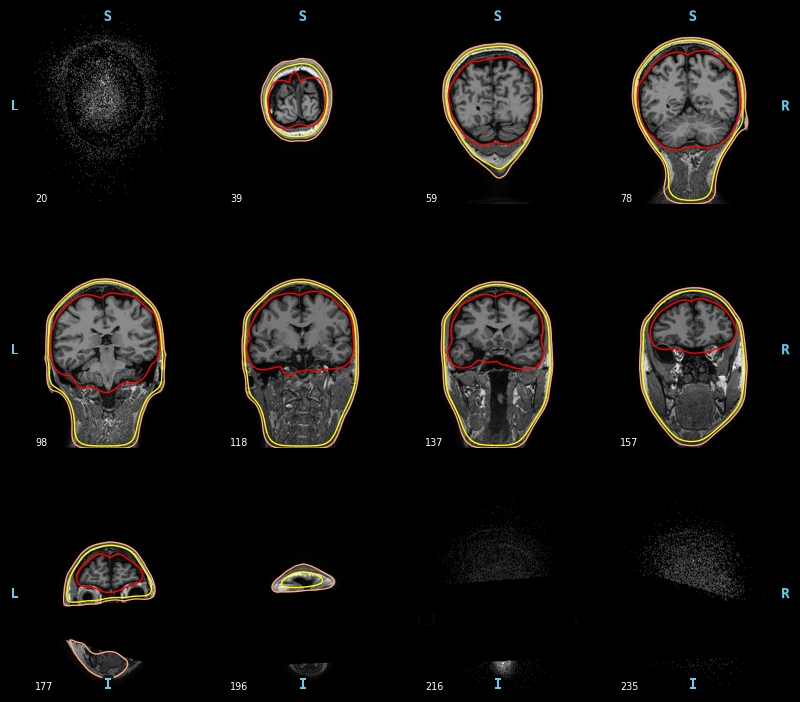

In [33]:
%matplotlib inline
_ = mne.viz.plot_bem(subject='sub-'+subject, subjects_dir=fs_subjects_dir)

## Spatial relationship of the brain to the MEG sensors

In [35]:
mne.viz.plot_alignment(raw.info, trans=trans, subject='sub-'+subject, subjects_dir=fs_subjects_dir, dig=True, surfaces='pial')

Getting helmet for system CTF_275
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 272


## What is a forward Model?
## Simulation of all the source locations through the BEM

In [36]:
print(forward['sol']['data'].shape)
print('Channels, Source Locations X 3')

(272, 28788)
Channels, Source Locations X 3


In [37]:
from mne.viz.topomap import plot_topomap

In [38]:
tmp=raw.copy()
grads = [i for i in tmp.ch_names if i[0]=='M']
_=tmp.pick_channels(grads)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Removing 5 compensators from info because not all compensation channels were picked.


In [42]:
%matplotlib qt
fig, axs = plt.subplots(3,2)
axs[0,0].set_title('Location 1 Forward Model')
plot_topomap(forward['sol']['data'][:,1003], tmp.info, axes=axs[0,0])
plot_topomap(forward['sol']['data'][:,1004], tmp.info, axes=axs[1,0])
plot_topomap(forward['sol']['data'][:,1005], tmp.info, axes=axs[2,0])

axs[0,1].set_title('Location 2 Forward Model')
plot_topomap(forward['sol']['data'][:,5003], tmp.info, axes=axs[0,1])
plot_topomap(forward['sol']['data'][:,5004], tmp.info, axes=axs[1,1])
plot_topomap(forward['sol']['data'][:,5005], tmp.info, axes=axs[2,1])


(<matplotlib.image.AxesImage at 0x7fb20bf74f90>,
 <matplotlib.contour.QuadContourSet at 0x7fb2b81288d0>)

Text(0, 0.5, 'Channel index')

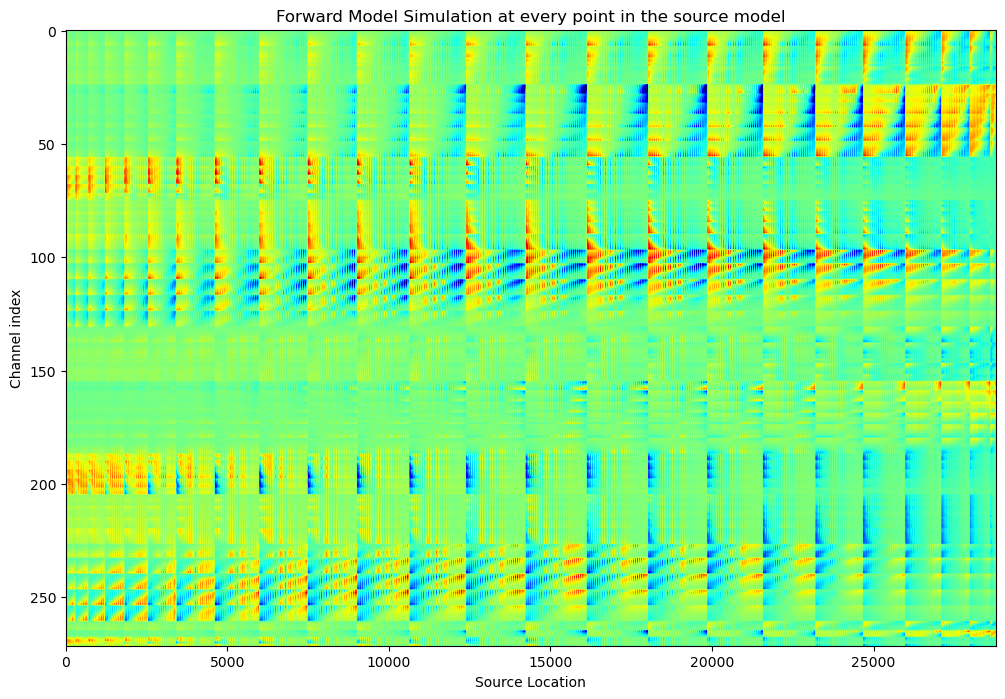

In [45]:
%matplotlib inline
fig=plt.figure(figsize=(12,8))
plt.imshow(forward['sol']['data'], aspect='auto', cmap='jet', vmax=3e-6, vmin=-3e-6)
plt.title('Forward Model Simulation at every point in the source model')
plt.xlabel('Source Location')
plt.ylabel('Channel index')